# Create Machine learning model for public bike parking lots predictions

After Worked on data analytics, we will get started to build up machine learning models 

In [6]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from IPython.display import display



pd.set_option('display.max_rows',5)
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', None)  # 自动调整宽度

li = []
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        df = pd.read_csv(dirname+filename, index_col=None, header=0)
        li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame


,_id,station_no,station_name,station_name_en,district,district_en,total,rentAvailable,returnAvaiable,updated_time,info_time
0,66477f00ffd73e577b8e8ee9,500101001,YouBike2.0_捷運科技大樓站,YouBike2.0_MRT Technology Bldg. Sta.,大安區,Daan Dist.,28,2,26,2024-05-17 23:58:23,2024-05-18 00:00:00
1,66477f00ffd73e577b8e8eea,500101002,YouBike2.0_復興南路二段273號前,YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.,大安區,Daan Dist.,21,4,17,2024-05-17 23:58:23,2024-05-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
814260,664f66d4ffd73e577be875f2,500119082,YouBike2.0_臺大四號館東北側,YouBike2.0_NTU Building No.4(Northeast),臺大公館校區,NTU Dist,10,6,4,2024-05-23 23:53:23,2024-05-23 23:55:00
814261,664f66d4ffd73e577be875f8,500119088,YouBike2.0_臺大黑森林西側,YouBike2.0_NTU Black Forest(West),臺大公館校區,NTU Dist,20,2,18,2024-05-23 23:53:23,2024-05-23 23:55:00


## Before we start building machine learning model
We have several things to do when build up model
- drop unused columns
- data type transformations
- leaving out the outliers
- split data into training set and test set

### Drop unused columns 
In the last page, we have identified the data with the type. 
we start to drop columns with serial numbers or their station name. 

In [7]:
frame.drop(columns=['_id', 'station_name','station_name_en','district','district_en'],inplace=True)

frame

,station_no,total,rentAvailable,returnAvaiable,updated_time,info_time
0,500101001,28,2,26,2024-05-17 23:58:23,2024-05-18 00:00:00
1,500101002,21,4,17,2024-05-17 23:58:23,2024-05-18 00:00:00
...,...,...,...,...,...,...
814260,500119082,10,6,4,2024-05-23 23:53:23,2024-05-23 23:55:00
814261,500119088,20,2,18,2024-05-23 23:53:23,2024-05-23 23:55:00


### Leaving out error values 
 

In [8]:
frame = frame.loc[(frame['total'] == frame['rentAvailable'] + frame['returnAvaiable']),:]

frame.drop(columns='station_no',inplace=True)

frame

/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_89604/1947658609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.drop(columns='station_no',inplace=True)


,total,rentAvailable,returnAvaiable,updated_time,info_time
0,28,2,26,2024-05-17 23:58:23,2024-05-18 00:00:00
1,21,4,17,2024-05-17 23:58:23,2024-05-18 00:00:00
...,...,...,...,...,...
814260,10,6,4,2024-05-23 23:53:23,2024-05-23 23:55:00
814261,20,2,18,2024-05-23 23:53:23,2024-05-23 23:55:00


In [9]:

## convert datetime strings to datetime formats
frame['info_time'] = pd.to_datetime(frame['info_time'],format='%Y-%m-%d %H:%M:%S')
frame['updated_time'] = pd.to_datetime(frame['updated_time'],format='%Y-%m-%d %H:%M:%S')

## calculate time difference between station updated time and current time
timeDiff = (frame['info_time'] - frame['updated_time']) / pd.Timedelta(minutes=1)

frame['TimeDiff'] = timeDiff
frame['hours'] = frame['info_time'].dt.hour

/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_89604/1608152123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['info_time'] = pd.to_datetime(frame['info_time'],format='%Y-%m-%d %H:%M:%S')
/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_89604/1608152123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['updated_time'] = pd.to_datetime(frame['updated_time'],format='%Y-%m-%d %H:%M:%S')
/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_89604/1608152123.py:8: Se

In [10]:
## judge if current time is workday or not
def isWorkHour (timeSeries):
    work_day = timeSeries.weekday() < 5
    work_hour = timeSeries.hour >= 8 & timeSeries.hour < 19
    return work_day & work_hour

workday = frame['info_time'].apply(isWorkHour)

frame['isWorkDay'] = workday

frame

/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_89604/2541519960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['isWorkDay'] = workday


,total,rentAvailable,returnAvaiable,updated_time,info_time,TimeDiff,hours,isWorkDay
0,28,2,26,2024-05-17 23:58:23,2024-05-18 00:00:00,1.616667,0,False
1,21,4,17,2024-05-17 23:58:23,2024-05-18 00:00:00,1.616667,0,False
...,...,...,...,...,...,...,...,...
814260,10,6,4,2024-05-23 23:53:23,2024-05-23 23:55:00,1.616667,23,True
814261,20,2,18,2024-05-23 23:53:23,2024-05-23 23:55:00,1.616667,23,True


In [11]:
## Add ratio between rentAvailable and total
ratio = frame['rentAvailable'] / frame['total']

frame['ratio'] = ratio

/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_89604/133128789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ratio'] = ratio


In [12]:
## remove columns with date data type
frame.drop(columns=['info_time','updated_time'], inplace=True)

/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_89604/3284268876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.drop(columns=['info_time','updated_time'], inplace=True)


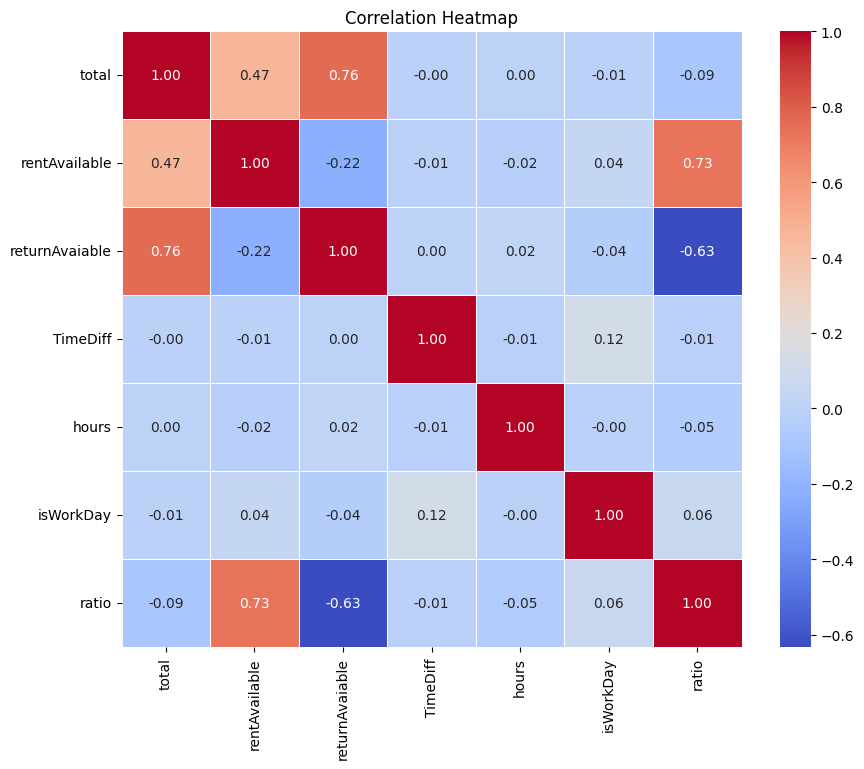

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = frame.corr()

# 繪製 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


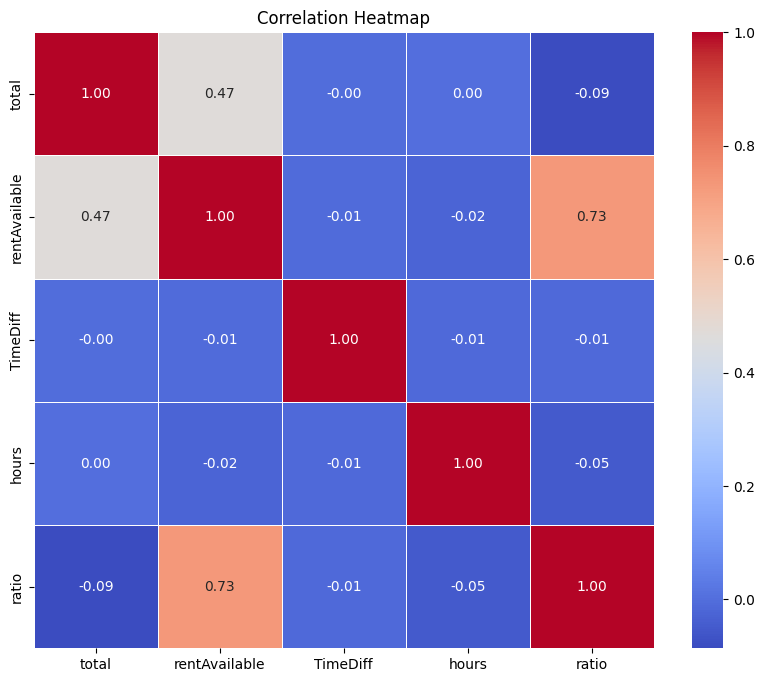

In [19]:
frame1 = frame.copy()
frame1.drop(columns=['returnAvaiable','isWorkDay'],inplace=True)
corr_matrix = frame1.corr()

# 繪製 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [21]:
## split training set and test set
# 分割特徵和標籤
X = frame.drop('rentAvailable', axis=1)  # 特徵
y = frame['rentAvailable']  # 標籤

# 使用 train_test_split 將資料分割成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 檢查分割後的資料集大小
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {X_test.shape}")

X_train shape: (495097, 6)
X_test shape: (212185, 6)
y_train shape: (495097,)
y_test shape: (212185,)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 建立並訓練線性回歸模型
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
# 計算均方誤差 (MSE)
mse = mean_squared_error(y_test, y_pred)

# 計算均絕對誤差 (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 計算 R 平方 (R² Score)
r_squared = r2_score(y_test, y_pred)

# 計算調整後的 R 平方
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# 印出模型績效
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R Squared (R²):", r_squared)
print("Adjusted R Squared (Adjusted R²):", adj_r_squared)

# 輸出 y_pred
y_pred

Mean Squared Error (MSE): 8.044833884925732e-25
Mean Absolute Error (MAE): 6.597758865145705e-13
R Squared (R²): 1.0
Adjusted R Squared (Adjusted R²): 1.0


array([ 7.,  6., 14., ...,  8., 16.,  1.])